In [1]:
%matplotlib inline


In [9]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import pandas_datareader.data as web
import datetime

In [17]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 5, 9)
aapl=web.DataReader("AAPL","yahoo",start,end)
# The syntax to the api is (ticker symbol, source of data, start/end date)

In [19]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,27.146566,111902700


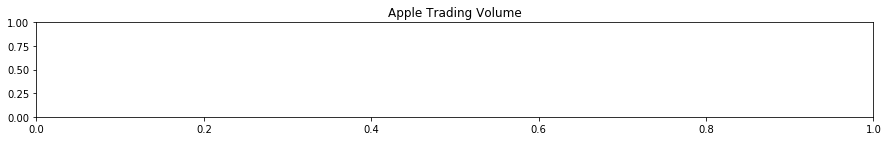

In [39]:
# plot stock price and volume
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(aapl.index,aapl["Close"])
plt.title("Apple Price from 2010 to 2015")

top = plt.subplot2grid((4,4), (0, 0), rowspan=1, colspan=4)
bottom.plot(aapl.index,aapl["Volume"])
plt.title("Apple Trading Volume")

plt.gcf().set_size_inches(15,8)

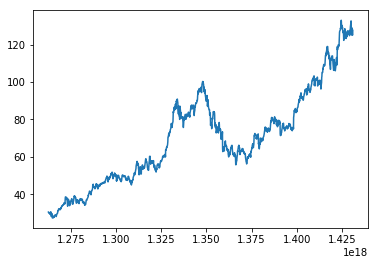

In [26]:
plt.plot(aapl.index,aapl["Close"])

In [32]:
aapl.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [35]:
aapl["Volume"]=aapl["Volume"].astype(float)
aapl.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

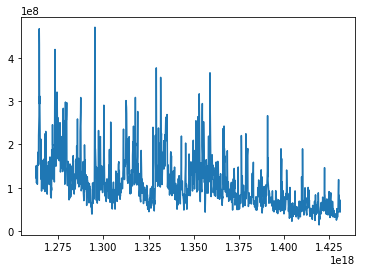

In [38]:
plt.plot(aapl.index,aapl["Volume"]);

In [49]:
# Calculating moving averages
# Multiple assignment is used here
mavg=aapl["30_MA_Open"]=aapl["Open"].rolling(window=30).mean() 
aapl["30_MA_Open"].tail()

Date
2015-05-04    127.073334
2015-05-05    127.107667
2015-05-06    127.085334
2015-05-07    127.026333
2015-05-08    127.157000
Name: 30_MA_Open, dtype: float64

In [50]:
aapl.shape

(1346, 7)

In [51]:
# Look at selected rows
aapl[160:165]

,Open,High,Low,Close,Adj Close,Volume,30_MA_Open
Date,,,,,,,
2010-08-23,35.970001,36.000000,35.035713,35.114285,31.477621,103510400.0,36.503810
2010-08-24,34.667141,34.714287,34.092857,34.275715,30.725895,150641400.0,36.438810
2010-08-25,34.005714,34.855713,33.885715,34.698570,31.104952,149216900.0,36.384810
2010-08-26,35.064285,35.107143,34.325714,34.325714,30.770714,116626300.0,36.371571
2010-08-27,34.535713,34.658573,33.651428,34.517143,30.942331,137097800.0,36.317143


In [52]:
# Index into a specific date
aapl.loc["2010-01-06"]

Open          3.062571e+01
High          3.074714e+01
Low           3.010714e+01
Close         3.013857e+01
Adj Close     2.701722e+01
Volume        1.380400e+08
30_MA_Open             NaN
Name: 2010-01-06 00:00:00, dtype: float64

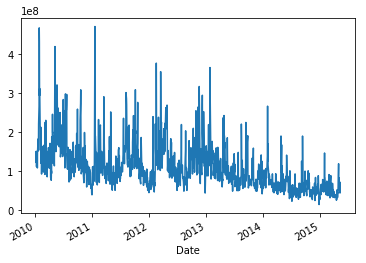

In [53]:
# Look at volume for the time period
aapl.Volume.plot()

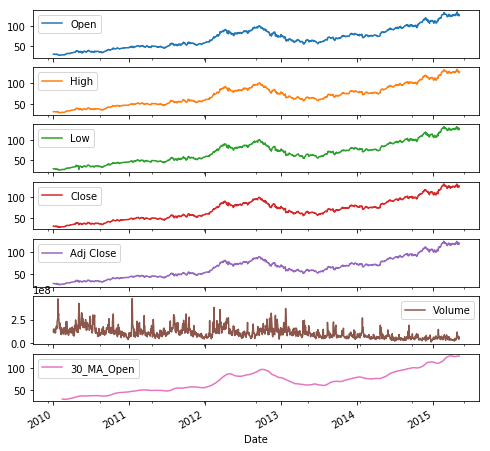

In [54]:
# More plots here 
aapl.plot(subplots=True,figsize=(8,8));
# subplots= True option means that all plots can be ploted seperaely
# Don't forget about the best location setting here
plt.legend(loc="best")
plt.show()

In [55]:
close_px=aapl["Adj Close"]
mavg=close_px.rolling(window=30).mean()

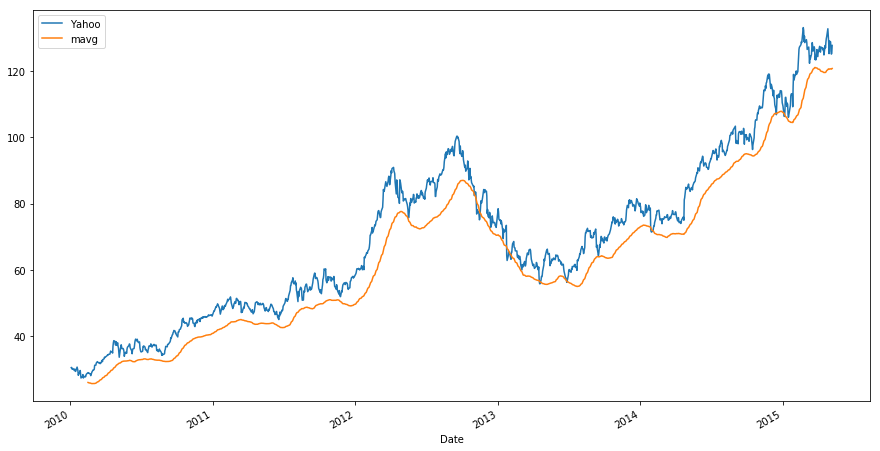

In [57]:
#Moving average plot
aapl.Close.plot(label="Yahoo")
mavg.plot(label="mavg")
plt.legend(loc="best")
plt.gcf().set_size_inches(15,8)

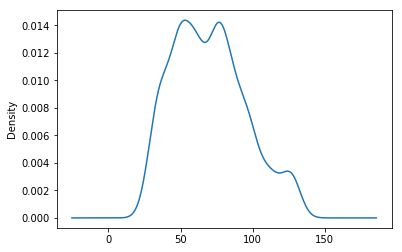

In [59]:
# KDE plot 
aapl.Close.plot(kind="kde")

Definitions of the kde Plot
kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.